<a href="https://colab.research.google.com/github/WhoAreYou1224/datavis2025/blob/main/Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวัฒนศักดิ์ คลังแสง 663020039-3
2. นางสาวศศิวิมล ภาณุโชติ 663020040-8
3. นายภัทรพล วรรณยศ 663020287-4
4. ...

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:

!pip install nltk
!pip install wordcloud
!pip install Pillow
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [ ]:
# ----------------- Your code here -----------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# ----------------- Your code here -----------------
thai_tweets = open('/content/drive/MyDrive/DTW2/thailand_tweets.txt','r')

In [ ]:
th = thai_tweets.read()
j_thai_tweets = json.loads(th)

In [ ]:
j_thai_tweets

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
# ----------------- Your code here -----------------
pd_thai_tweets = pd.read_json(StringIO(j_thai_tweets), orient='index').head()
pd_thai_tweets

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


In [ ]:
pd_thai_tweets.shape

(5, 16)

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here ----------------- (Kaw,Per)
elon_json = json.loads(j_thai_tweets)
elon_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [ ]:
from io import StringIO
pd_elon_json = pd.read_json(StringIO(json.dumps(elon_json)), orient='index')
pd_elon_json.head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


In [ ]:
# ----------------- Your code here -----------------
print(f"The total number of tweets collected in the file is: {len(elon_json)}")

The total number of tweets collected in the file is: 29


In [ ]:
#The content of the first tweet:
elon_json[first_key]['content']

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

In [ ]:
elon_json.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
#Is the first tweet contained any hashtags or mentions?
first_key = list(elon_json.keys())[0]
elon_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

In [ ]:
#Collect all hashtags related to Thailand from this data
from collections import Counter

hashtags = []
for tweet in elon_json.values():
    for tag in tweet.get("hashtags", []):
        if "thailand" in tag.lower():
            hashtags.append(tag)

hashtag_counts = Counter(hashtags)

for tag, count in hashtag_counts.items():
    print(f"{tag}: {count}")

thailand: 1
Thailand: 1


In [ ]:
#Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

pd_elon_json['most_popular'] = pd_elon_json['retweets'] + pd_elon_json['replies'] + pd_elon_json['likes']
pd_elon_json.sort_values(by='most_popular', ascending=False).head()



,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link,most_popular
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,,242
2019-08-02 16:12:21.324992513,1564762341324992512,Zeepruk_jfc,ZeePruk_JapanFC（Rest）,https://twitter.com/Zeepruk_jfc/photo,2,54,32,False,2022-08-30 23:49:48+00:00,Can you help me?\n\ntracking number\nFMP200001...,[Zunshine],[],[],[],https://twitter.com/Zeepruk_jfc/status/1564762...,,88
2019-08-02 16:35:29.967054848,1564763729967054848,o_rung_o1,o_Rung_o,https://twitter.com/o_rung_o1/photo,0,28,15,False,2022-08-30 23:55:19+00:00,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,"[SDA2022, voteforppkritt, ppkritt]",[],[https://pbs.twimg.com/media/FbcoUQAaQAAIFME?f...,[],https://twitter.com/o_rung_o1/status/156476372...,,43
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,,20
2019-08-02 16:26:25.244426240,1564763185244426240,Jay_beebee,Jay Bee,https://twitter.com/Jay_beebee/photo,1,7,7,True,2022-08-30 23:53:09+00:00,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...","[JAYB, 제이비, GOT7, 갓세븐, CDNZA, Def]","[jaybnow_hr, GOT7, cdnzarecords]",[https://pbs.twimg.com/media/FbcmB6RUEAA75m6?f...,[],https://twitter.com/Jay_beebee/status/15647631...,,15


In [ ]:
max_popularity = pd_elon_json['most_popular'].max()
print("Maximum popularity score:", max_popularity)

Maximum popularity score: 242


In [ ]:
top5_idx = np.argsort(pd_elon_json['most_popular'].values)[::-1][:5]
top5 = pd_elon_json.iloc[top5_idx]
print(top5)

                                          tweet_id       username  \
2019-08-02 16:47:25.825458181  1564764445825458176  OhmPawatInter   
2019-08-02 16:12:21.324992513  1564762341324992512    Zeepruk_jfc   
2019-08-02 16:35:29.967054848  1564763729967054848      o_rung_o1   
2019-08-02 16:46:01.742110720  1564764361742110720   nato_tonyo11   
2019-08-02 16:26:25.244426240  1564763185244426240     Jay_beebee   

                                                      name  \
2019-08-02 16:47:25.825458181       OhmPawat International   
2019-08-02 16:12:21.324992513        ZeePruk_JapanFC（Rest）   
2019-08-02 16:35:29.967054848                     o_Rung_o   
2019-08-02 16:46:01.742110720  nutri(BUSY SI ENGR.)| SoliD   
2019-08-02 16:26:25.244426240                      Jay Bee   

                                                       profile_picture  \
2019-08-02 16:47:25.825458181  https://twitter.com/OhmPawatInter/photo   
2019-08-02 16:12:21.324992513    https://twitter.com/Zeepruk_jfc

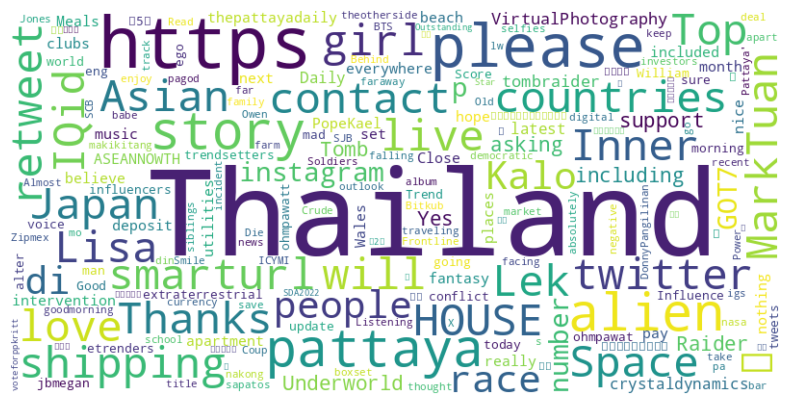

In [ ]:
# Combine all tweet contents into a single string
all_tweet_content = " ".join(pd_elon_json['content'])

# Create a WordCloud object without specifying font_path
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweet_content)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [2]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/DTW2"
reviewFilePath = "Copy of yelp_academic_dataset_review.json"
businessFilePath = "Copy of yelp_academic_dataset_business.json"
userFilePath = "Copy of yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [4]:
# We only use the first 100,000 reviews
import json
import pandas as pd
n = 100000
reviews = []
with open(myDirectory+'/'+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [6]:
businesses = []
with open(myDirectory+'/'+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [7]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [8]:
users = []
with open(myDirectory+'/'+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [10]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,1,0,0,0,0,0,0,0,0,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4.0,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,Metro Diner,...,0,0,0,0,0,0,3,3,0,0
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1.0,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,Esporta Fitness,...,0,0,0,0,0,3,0,0,0,0
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4.0,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,Buena Vista Mexican Restaurant,...,0,0,0,0,1,1,0,0,0,0
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2.0,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,The Love,...,1,0,0,0,5,1,1,1,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

จำนวนผู้ใช้ทั้งหมด: 79345
จำนวนรีวิวทั้งหมด: 100000

สถิติสรุปของจำนวนรีวิวต่อผู้ใช้:
count    79345.000000
mean         1.260319
std          0.956611
min          1.000000
50%          1.000000
75%          1.000000
90%          2.000000
95%          2.000000
99%          5.000000
max         65.000000
Name: review_count_user, dtype: float64

ค่ากลาง:
Median: 1
Mode  : 1
≥1 ครั้ง: 100.00%
≥2 ครั้ง: 14.70%
≥5 ครั้ง: 1.28%
≥10 ครั้ง: 0.20%
≥20 ครั้ง: 0.02%
≥50 ครั้ง: 0.00%
≥100 ครั้ง: 0.00%


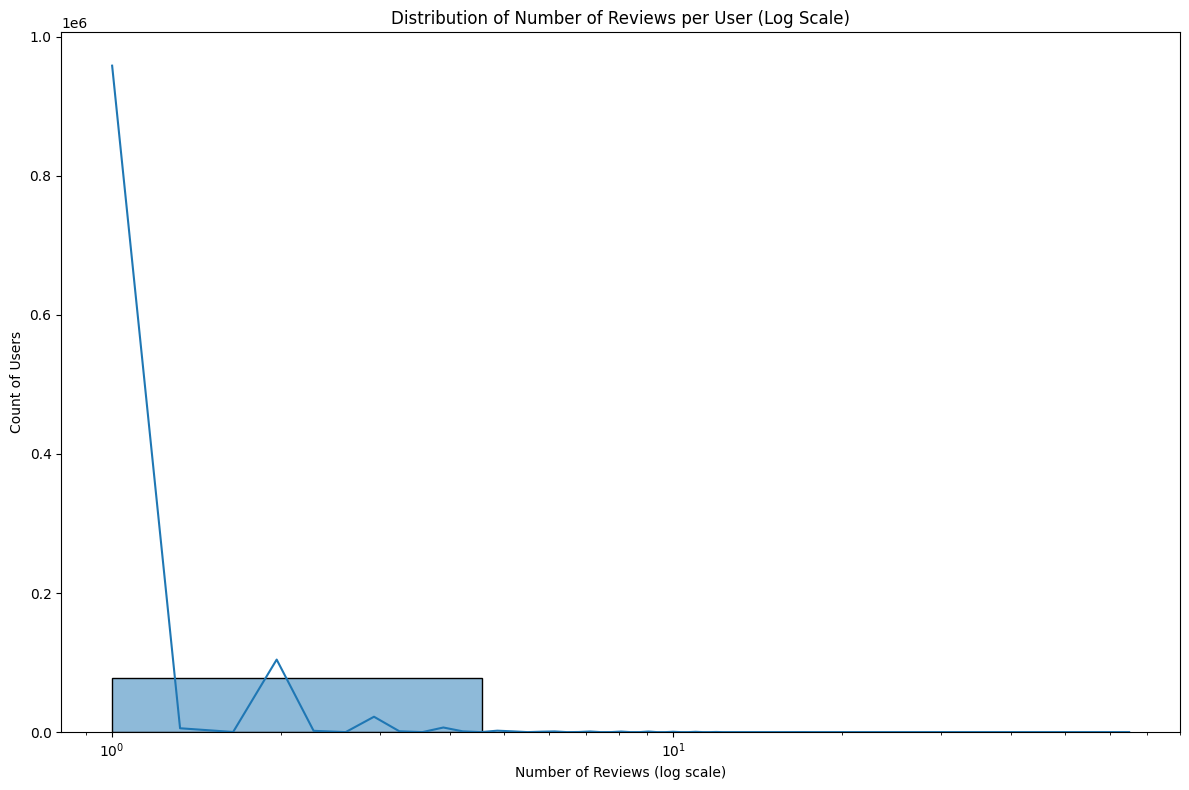

In [15]:
USER_COL = "user_id"   # ← ถ้าของคุณชื่อ "userId" หรืออย่างอื่น ให้แก้ตรงนี้
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

assert USER_COL in df.columns, f"ไม่พบคอลัมน์ {USER_COL} ใน df.columns"

# 1) สร้างตาราง “จำนวนรีวิวต่อผู้ใช้” = 1 แถวต่อผู้ใช้
user_counts = (
    df.groupby(USER_COL, as_index=False)
      .size()
      .rename(columns={'size': 'review_count_user'})
)

# 2) สถิติสรุปสำคัญ
print("จำนวนผู้ใช้ทั้งหมด:", len(user_counts))
print("จำนวนรีวิวทั้งหมด:", len(df))
print("\nสถิติสรุปของจำนวนรีวิวต่อผู้ใช้:")
print(user_counts['review_count_user'].describe(percentiles=[.5, .75, .9, .95, .99]))

print("\nค่ากลาง:")
print("Median:", int(user_counts['review_count_user'].median()))
print("Mode  :", int(user_counts['review_count_user'].mode().iloc[0]))

# สัดส่วนผู้ใช้ที่รีวิวอย่างน้อย N ครั้ง (ดู tail/heavy users)
for n in [1, 2, 5, 10, 20, 50, 100]:
    share = (user_counts['review_count_user'] >= n).mean()
    print(f"≥{n} ครั้ง: {share:.2%}")

# 3) พล็อตฮิสโตแกรม (แกน X เป็น log) + KDE
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=user_counts, x='review_count_user', ax=ax, kde=True)
ax.set_xscale('log')
ax.set_title('Distribution of Number of Reviews per User (Log Scale)')
ax.set_xlabel('Number of Reviews (log scale)')
ax.set_ylabel('Count of Users')
plt.tight_layout()
plt.show()



สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

จำนวนธุรกิจทั้งหมด: 9973
จำนวนรีวิวทั้งหมด: 100000

สถิติ 'จำนวนรีวิวต่อธุรกิจ':
count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
50%         3.000000
75%         9.000000
90%        23.000000
95%        40.000000
99%       106.280000
max       950.000000
Name: review_count_business, dtype: float64

สถิติ 'ค่าเฉลี่ยดาวต่อธุรกิจ':
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
10%         2.000000
25%         3.000000
50%         4.000000
75%         4.750000
90%         5.000000
95%         5.000000
99%         5.000000
max         5.000000
Name: avg_stars, dtype: float64


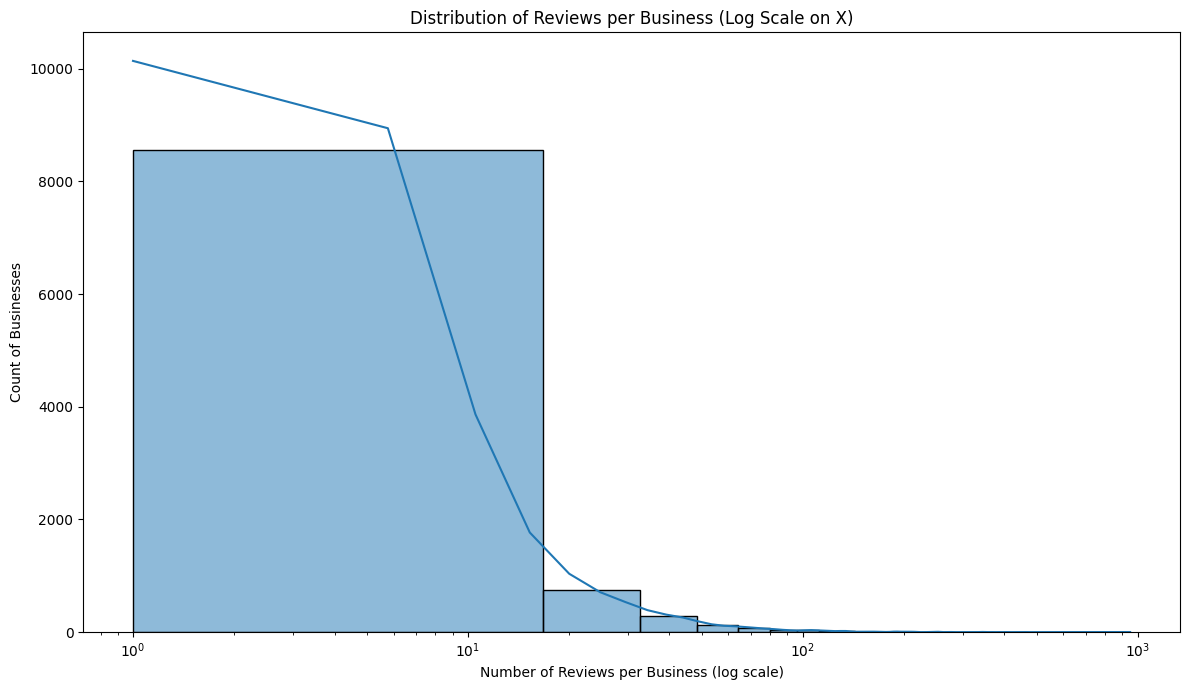

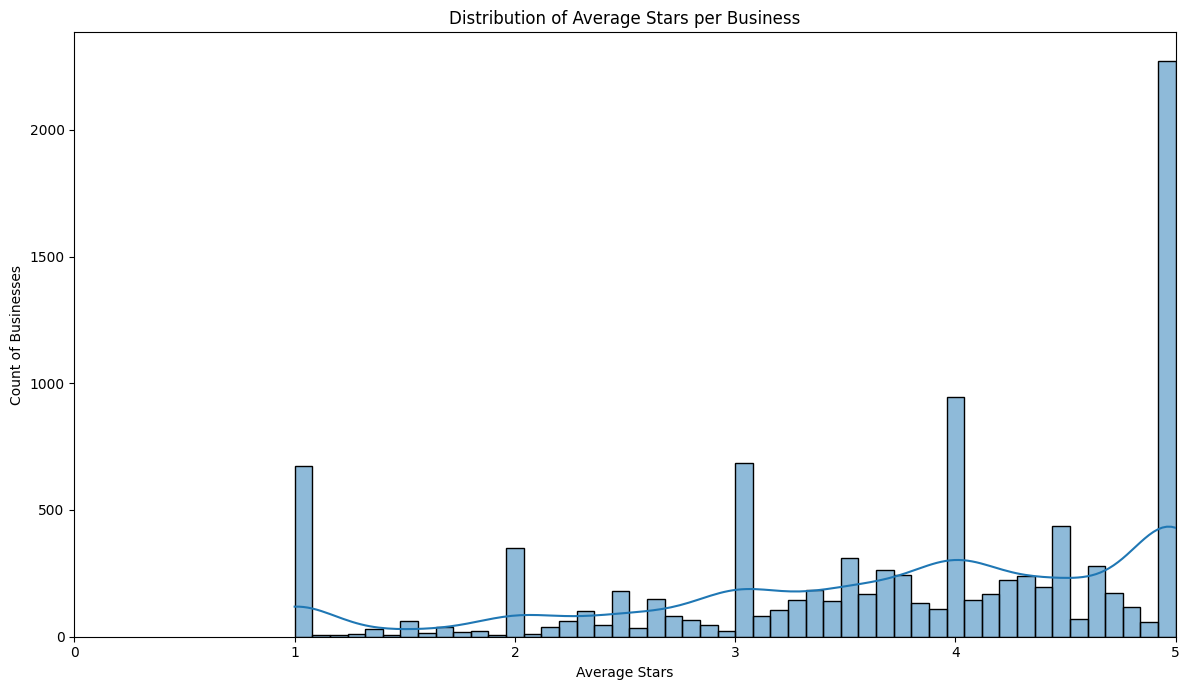

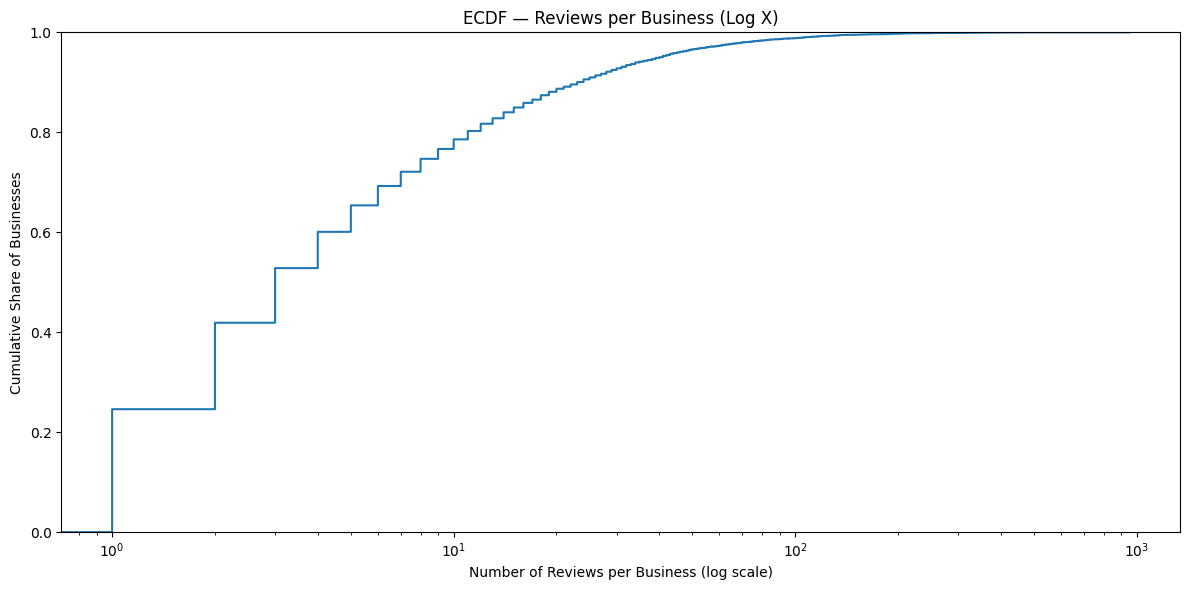

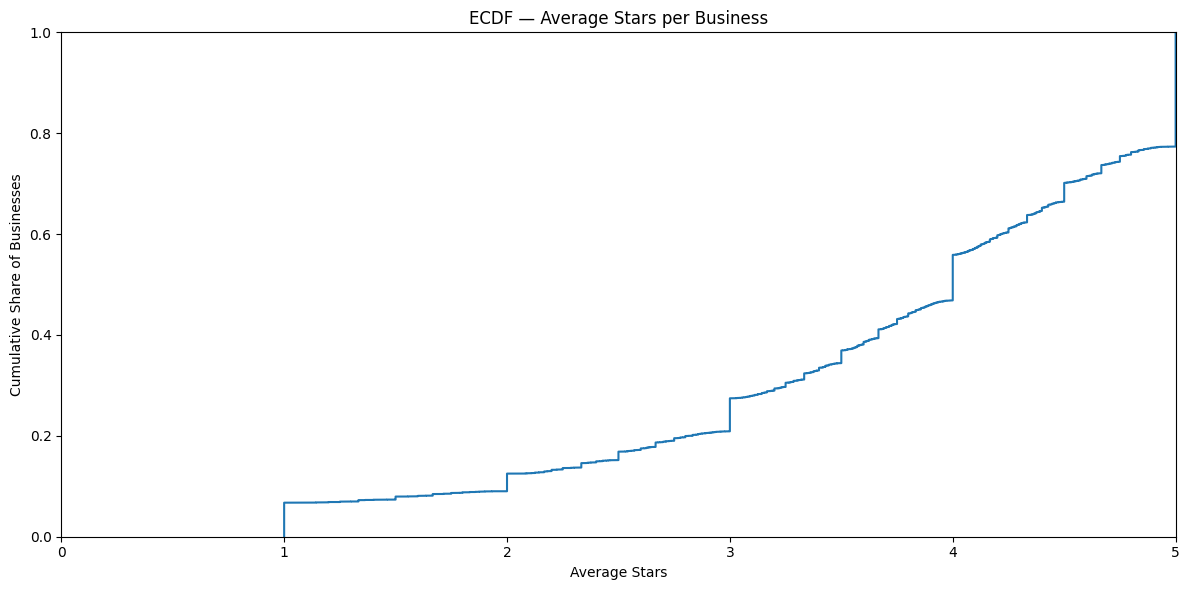

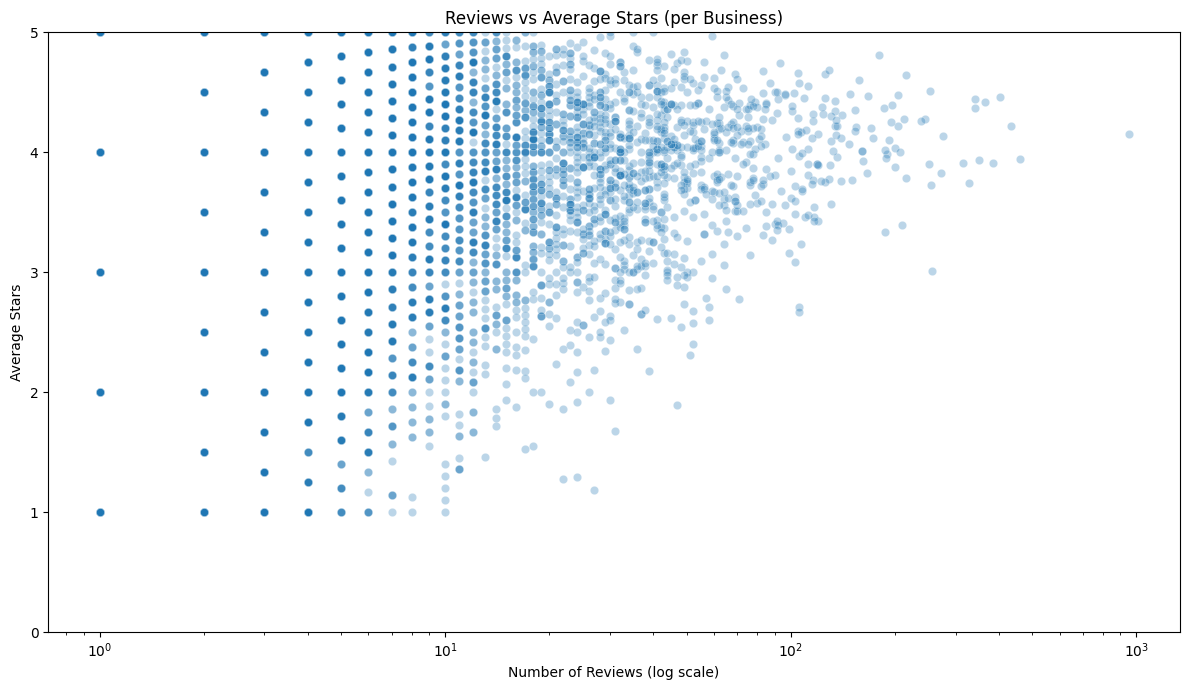

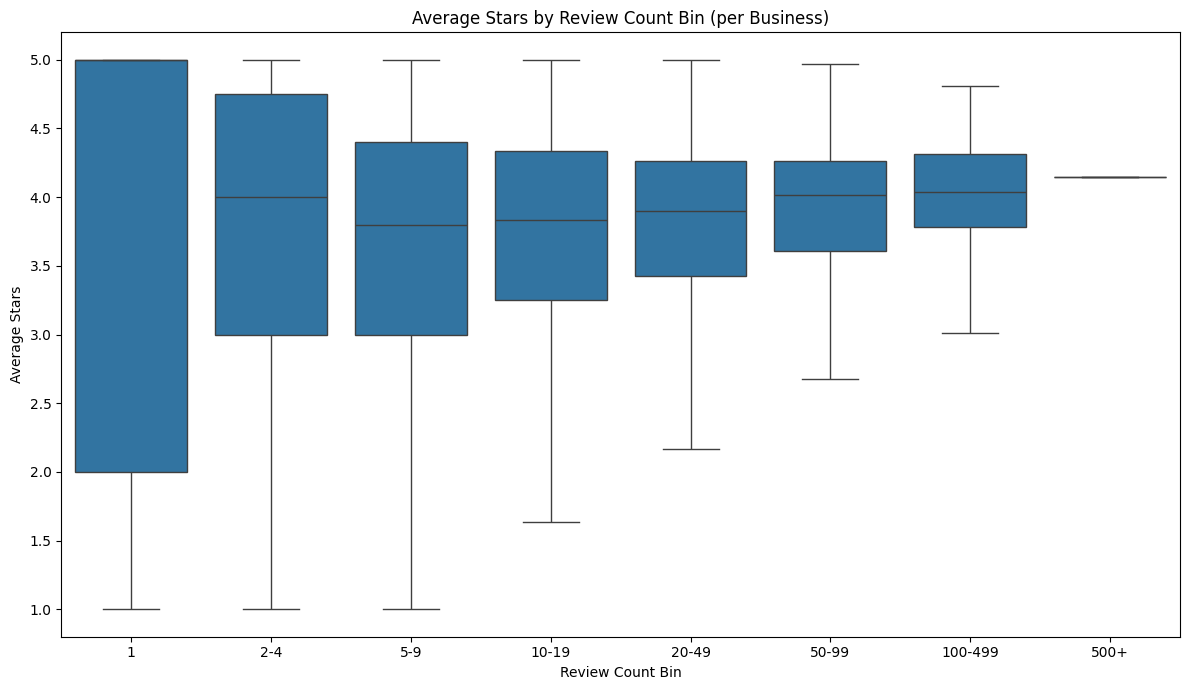


Top 20 ธุรกิจที่มีจำนวนรีวิวมากที่สุด:
                 business_id  review_count_business  avg_stars
2654  GBTPC53ZrG1ZBY3DT8Mbcw                    950   4.149474
4084  PY9GRfzr4nTZeINf346QOw                    460   3.943478
5109  W4ZEKkva9HpAdZG88juwyQ                    433   4.221709
9233  vN6v8m4DO45Z4pp8yxxF_w                    404   4.457921
8268  pSmOH4a3HNNpYM82J5ycLA                    384   3.911458
1569  8uF-bhJFgT4Tn6DTb27viA                    365   4.419178
4563  SZU9c8V2GuREDN5KgyHFJw                    351   3.931624
5704  Zi-F-YvyVOK0k5QD7lrLOg                    342   4.371345
4830  UCMSWPqzXjd7QHq7v8PJjQ                    341   4.445748
3577  M0r9lUn2gLFYgIwIfG8-bQ                    327   3.743119
2471  EtKSTHV5Qx_Q7Aur9o4kQQ                    316   3.914557
6300  cXSyVvOr9YRN9diDkaWs0Q                    275   4.138182
6845  g04aAvgol7IW8buqSbT4xA                    272   3.827206
3939  ORL4JE6tz3rJxVqkdKfegA                    257   3.011673
6479  d_tRshM-w

In [17]:
BUSINESS_COL = "business_id"   # ชื่อคอลัมน์รหัสธุรกิจ
STARS_COL    = "stars_review"         # ชื่อคอลัมน์คะแนนที่รีวิวให้ (ต่อแถวรีวิว)
MIN_REVIEWS_FOR_TOP = 10       # เกณฑ์ขั้นต่ำเวลาโชว์ Top ดาว เผื่อกันธุรกิจที่มีรีวิว 1-2 อัน
# ========================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

assert BUSINESS_COL in df.columns, f"ไม่พบคอลัมน์ {BUSINESS_COL} ใน df"
assert STARS_COL in df.columns, f"ไม่พบคอลัมน์ {STARS_COL} ใน df"

# 1) สรุประดับ "ธุรกิจ" : 1 แถว = 1 ธุรกิจ
biz = (
    df.groupby(BUSINESS_COL)
      .agg(
          review_count_business = (STARS_COL, "size"),
          avg_stars            = (STARS_COL, "mean"),
          median_stars         = (STARS_COL, "median"),
          std_stars            = (STARS_COL, "std")
      )
      .reset_index()
)

# 2) สถิติสรุป
print("จำนวนธุรกิจทั้งหมด:", len(biz))
print("จำนวนรีวิวทั้งหมด:", len(df))
print("\nสถิติ 'จำนวนรีวิวต่อธุรกิจ':")
print(biz['review_count_business'].describe(percentiles=[.5,.75,.9,.95,.99]))

print("\nสถิติ 'ค่าเฉลี่ยดาวต่อธุรกิจ':")
print(biz['avg_stars'].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99]))

# 3) ฮิสโตแกรมจำนวนรีวิวต่อธุรกิจ (สเกลแกน X เป็น log)
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=biz, x='review_count_business', bins=60, kde=True, ax=ax)
ax.set_xscale('log')
ax.set_title('Distribution of Reviews per Business (Log Scale on X)')
ax.set_xlabel('Number of Reviews per Business (log scale)')
ax.set_ylabel('Count of Businesses')
plt.tight_layout()
plt.show()

# 4) ฮิสโตแกรมค่าเฉลี่ยดาวต่อธุรกิจ (มักอยู่ช่วง 0–5)
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=biz, x='avg_stars', bins=50, kde=True, ax=ax)
ax.set_title('Distribution of Average Stars per Business')
ax.set_xlabel('Average Stars')
ax.set_ylabel('Count of Businesses')
ax.set_xlim(0, 5)  # ถ้าเรต 0–5
plt.tight_layout()
plt.show()

# 5) ECDF ทั้งสองตัวแปรเพื่อดูภาพสะสม
fig, ax = plt.subplots(figsize=(12, 6))
sns.ecdfplot(data=biz, x='review_count_business', ax=ax)
ax.set_xscale('log')
ax.set_title('ECDF — Reviews per Business (Log X)')
ax.set_xlabel('Number of Reviews per Business (log scale)')
ax.set_ylabel('Cumulative Share of Businesses')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
sns.ecdfplot(data=biz, x='avg_stars', ax=ax)
ax.set_title('ECDF — Average Stars per Business')
ax.set_xlabel('Average Stars')
ax.set_ylabel('Cumulative Share of Businesses')
ax.set_xlim(0, 5)
plt.tight_layout()
plt.show()

# 6) ความสัมพันธ์: จำนวนรีวิว vs ค่าเฉลี่ยดาว
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(data=biz, x='review_count_business', y='avg_stars',
                alpha=0.3, ax=ax)
ax.set_xscale('log')
ax.set_ylim(0, 5)
ax.set_title('Reviews vs Average Stars (per Business)')
ax.set_xlabel('Number of Reviews (log scale)')
ax.set_ylabel('Average Stars')
plt.tight_layout()
plt.show()

# (ทางเลือก) ทำ bin ของจำนวนรีวิวแล้วดู boxplot ของดาว
bins = [1, 2, 5, 10, 20, 50, 100, 500, np.inf]
labels = ["1", "2-4", "5-9", "10-19", "20-49", "50-99", "100-499", "500+"]
biz['review_bin'] = pd.cut(biz['review_count_business'], bins=bins, labels=labels, right=False)
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=biz, x='review_bin', y='avg_stars', ax=ax, showfliers=False)
ax.set_title('Average Stars by Review Count Bin (per Business)')
ax.set_xlabel('Review Count Bin')
ax.set_ylabel('Average Stars')
plt.tight_layout()
plt.show()

# 7) อันดับธุรกิจ
# 7.1 Top ธุรกิจตามจำนวนรีวิว
top_by_reviews = biz.sort_values('review_count_business', ascending=False).head(20)
print("\nTop 20 ธุรกิจที่มีจำนวนรีวิวมากที่สุด:")
print(top_by_reviews[[BUSINESS_COL, 'review_count_business', 'avg_stars']])

# 7.2 Top ธุรกิจตามค่าเฉลี่ยดาว (กำหนดขั้นต่ำจำนวนรีวิว)
cand = biz[biz['review_count_business'] >= MIN_REVIEWS_FOR_TOP]
top_by_avg = cand.sort_values('avg_stars', ascending=False).head(20)
print(f"\nTop 20 ธุรกิจค่าเฉลี่ยดาวสูงสุด (รีวิว ≥ {MIN_REVIEWS_FOR_TOP}):")
print(top_by_avg[[BUSINESS_COL, 'review_count_business', 'avg_stars']])

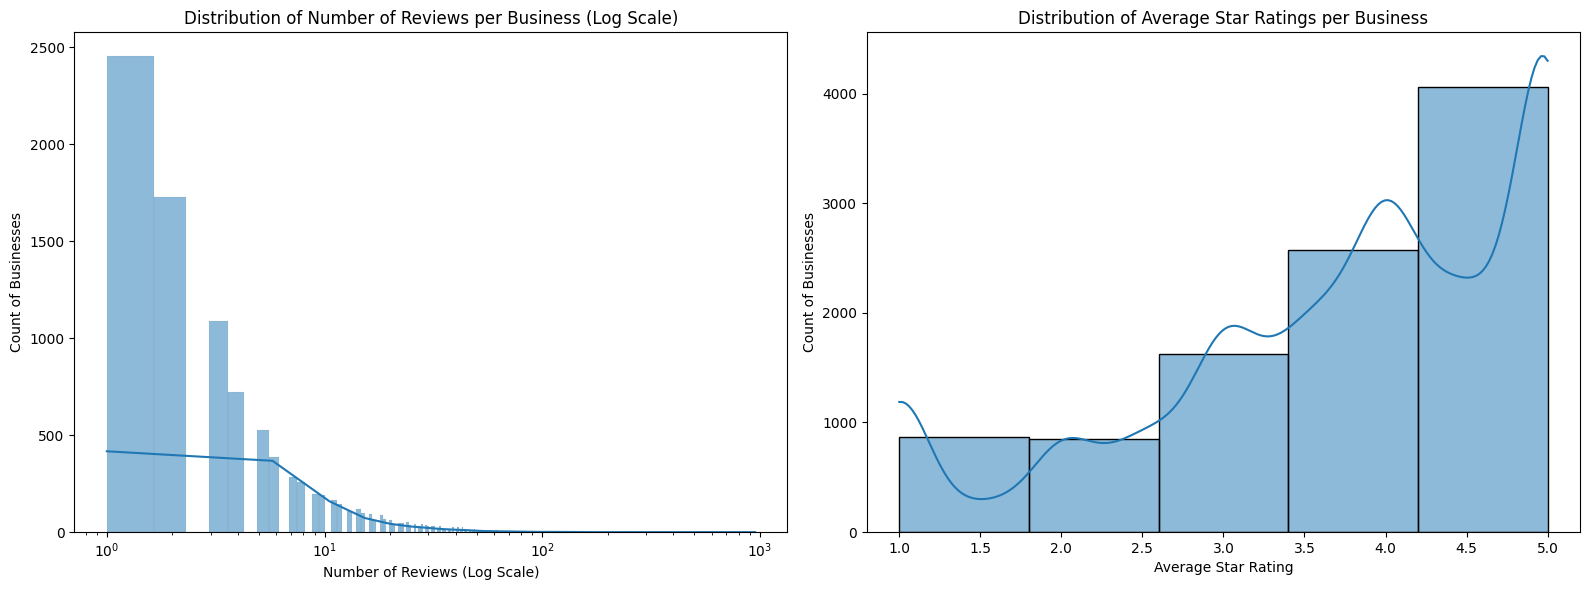

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: review_count, dtype: float64

Median number of reviews per business: 3.0
Mode (most common) number of reviews per business: 1
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: avg_stars, dtype: float64

Median average stars per business: 4.0
Mode (most common) average stars per business: 5.0


In [ ]:
# ----------------- Your code here ----------------- (ชก)
#Assuming df is your merged dataframe
# If not, uncomment and modify the following line:
# df = pd.read_csv('your_merged_data.csv')

# Group by business ID and count reviews and calculate average stars
business_stats = df.groupby('business_id').agg({'review_id': 'count', 'stars_review': 'mean'})
business_stats = business_stats.rename(columns={'review_id': 'review_count', 'stars_review': 'avg_stars'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of review count
sns.histplot(data=business_stats, x='review_count', ax=axes[0], kde=True)
axes[0].set_xscale('log')
axes[0].set_title('Distribution of Number of Reviews per Business (Log Scale)')
axes[0].set_xlabel('Number of Reviews (Log Scale)')
axes[0].set_ylabel('Count of Businesses')

# Histogram of average stars
sns.histplot(data=business_stats, x='avg_stars', ax=axes[1], kde=True, bins=5)
axes[1].set_title('Distribution of Average Star Ratings per Business')
axes[1].set_xlabel('Average Star Rating')
axes[1].set_ylabel('Count of Businesses')

plt.tight_layout()
plt.show()

# Print some statistics
print(business_stats['review_count'].describe())
print(f"\nMedian number of reviews per business: {business_stats['review_count'].median()}")
print(f"Mode (most common) number of reviews per business: {business_stats['review_count'].mode().values[0]}")

print(business_stats['avg_stars'].describe())
print(f"\nMedian average stars per business: {business_stats['avg_stars'].median()}")
print(f"Mode (most common) average stars per business: {business_stats['avg_stars'].mode().values[0]}")

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
categories = df['categories']
categories

,categories
0,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,"Active Life, Cycling Classes, Trainers, Gyms, ..."
2,"Restaurants, Breakfast & Brunch"
3,"Halal, Pakistani, Restaurants, Indian"
4,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
...,...
99995,"American (Traditional), Breakfast & Brunch, Re..."
99996,"Yoga, Gyms, Trainers, Fitness & Instruction, A..."
99997,"Mexican, Restaurants"
99998,"Restaurants, American (New), Breakfast & Brunc..."


In [ ]:
from collections import Counter

# Handle missing values in 'categories'
clean_categories = categories.dropna()

# Split categories into individual items and flatten the list
split_categories = clean_categories.str.split(', ')
all_categories = [item for sublist in split_categories for item in sublist]

# Count the frequency of each category
category_counts = Counter(all_categories)

display(category_counts)

Counter({'Restaurants': 72124,
         'Breakfast & Brunch': 13984,
         'Food': 29650,
         'Juice Bars & Smoothies': 2110,
         'American (New)': 16538,
         'Coffee & Tea': 7824,
         'Sandwiches': 10015,
         'Active Life': 2529,
         'Cycling Classes': 77,
         'Trainers': 381,
         'Gyms': 528,
         'Fitness & Instruction': 849,
         'Halal': 439,
         'Pakistani': 654,
         'Indian': 1491,
         'Beer': 3516,
         'Wine & Spirits': 3516,
         'Bars': 21927,
         'American (Traditional)': 14200,
         'Nightlife': 23298,
         'Mediterranean': 1985,
         'Seafood': 7950,
         'Greek': 1428,
         'Supernatural Readings': 165,
         'Tours': 1005,
         'Hotels & Travel': 6034,
         'Walking Tours': 348,
         'Arts & Entertainment': 5790,
         'Beer Bar': 1903,
         'Gastropubs': 1808,
         'Burgers': 7194,
         'Parks': 503,
         'Steakhouses': 2734,
         'Su

In [ ]:
# Calculate the total number of distinct categories
total_categories = len(category_counts)

# Print the result
print(f"There are {total_categories} ")

There are 980 


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว (คนละข้อ)

<ระบุจุดประสงค์ของการศึกษา>


-เพื่อศึกษา information ที่เป็นประโยชน์ต่อลูกค้า

#####top 5 business ใดที่ได้รีวิว 5 ดาวมากที่สุด

In [ ]:
bus_re = pd.merge(reviews, businesses, on='business_id', how='outer')
bus_re_clean = bus_re.dropna()
bus_re_clean

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
18,7snN_xdG7dtX4u1bdoNq0w,7iCjHZY74yCEF-Eajx5sIA,--ZVrH2X2QXBFdCilbirsw,5.0,0.0,0.0,0.0,This place is sadly perm closed. I was hoping ...,2018-02-24 00:53:41,Chris's Sandwich Shop,...,PA,19003,39.997299,-75.292207,4.5,32,0,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
19,5IJ8bbgtuaYY44jylnQ5lw,QD0DRN_ZY5czjHjzopEZzw,--ZVrH2X2QXBFdCilbirsw,3.0,0.0,0.0,0.0,"Really want this place to succeed, \nThey are...",2015-02-02 16:21:45,Chris's Sandwich Shop,...,PA,19003,39.997299,-75.292207,4.5,32,0,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
20,smRZuMTLFML_GImDsPmQVw,PlsB30q5bR2raPMpuN1Wuw,--ZVrH2X2QXBFdCilbirsw,5.0,0.0,0.0,0.0,One of the best hoagies I've ever had. The pro...,2014-12-18 18:14:15,Chris's Sandwich Shop,...,PA,19003,39.997299,-75.292207,4.5,32,0,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
21,xgAqKM3xkeTCtXC78gdnnQ,Gv9KfGk5j69oE9LugsLKiw,--ZVrH2X2QXBFdCilbirsw,5.0,0.0,1.0,2.0,Moving into our new house and I think the Ital...,2014-03-15 01:57:33,Chris's Sandwich Shop,...,PA,19003,39.997299,-75.292207,4.5,32,0,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
22,P1tdzQkq2S6NERhQhcTGlw,AxWV_6i2gC8-YBWOwtC5KA,--ZVrH2X2QXBFdCilbirsw,5.0,1.0,0.0,1.0,"Based on the reviews from the customers, I ord...",2016-03-31 16:39:04,Chris's Sandwich Shop,...,PA,19003,39.997299,-75.292207,4.5,32,0,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240363,FprSh7Wr8eHK8Mnh4v34tQ,51r0_XnhlHsnXHFRsiX44w,zzjFdJwXuxBOGe9JeY_EMw,4.0,2.0,0.0,0.0,Went in for lunch and tried the jerk chicken a...,2016-04-23 14:31:46,Taste of the Islands,...,PA,19401,40.125572,-75.333395,4.0,47,1,"{'RestaurantsTableService': 'False', 'Business...","Caribbean, Restaurants","{'Monday': '11:30-20:0', 'Tuesday': '11:30-20:..."
240364,FtyydqPfz68cJ_Bn0aK3Xw,Gu_zJwYF3dGvOgUp7E6GAA,zzjFdJwXuxBOGe9JeY_EMw,4.0,1.0,0.0,0.0,"My boss had a hankering for Jamaican food, so ...",2016-10-14 18:36:05,Taste of the Islands,...,PA,19401,40.125572,-75.333395,4.0,47,1,"{'RestaurantsTableService': 'False', 'Business...","Caribbean, Restaurants","{'Monday': '11:30-20:0', 'Tuesday': '11:30-20:..."
240365,Qcj5NQecigAJUmEmcvjfnw,tb7FwTK2SqpnzwgU9KeeDg,zzjFdJwXuxBOGe9JeY_EMw,5.0,0.0,0.0,1.0,OMG this place is the shit. Like it's not only...,2018-06-21 19:37:20,Taste of the Islands,...,PA,19401,40.125572,-75.333395,4.0,47,1,"{'RestaurantsTableService': 'False', 'Business...","Caribbean, Restaurants","{'Monday': '11:30-20:0', 'Tuesday': '11:30-20:..."
240371,grInAm8jANdKRSS1agfClg,GMFNrTTflpbBmPITdpsgEg,zzyx5x0Z7xXWWvWnZFuxlQ,1.0,1.0,0.0,0.0,Maybe the pizza is good here... but I can real...,2015-05-27 15:16:46,Walnut Street Pizza,...,PA,19102,39.949183,-75.164777,2.5,6,0,"{'RestaurantsTableService': 'False', 'BikePark...","Pizza, Caterers, Italian, Gluten-Free, Event P...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."


In [ ]:
bus_and_re = bus_re_clean[['name','stars_x']]
bus_and_re

,name,stars_x
18,Chris's Sandwich Shop,5.0
19,Chris's Sandwich Shop,3.0
20,Chris's Sandwich Shop,5.0
21,Chris's Sandwich Shop,5.0
22,Chris's Sandwich Shop,5.0
...,...,...
240363,Taste of the Islands,4.0
240364,Taste of the Islands,4.0
240365,Taste of the Islands,5.0
240371,Walnut Street Pizza,1.0


In [ ]:
five_star_businesses = bus_and_re[bus_and_re['stars_x'] == 5.0]
display(five_star_businesses)

,name,stars_x
18,Chris's Sandwich Shop,5.0
20,Chris's Sandwich Shop,5.0
21,Chris's Sandwich Shop,5.0
22,Chris's Sandwich Shop,5.0
23,Chris's Sandwich Shop,5.0
...,...,...
240307,Tire Kingdom,5.0
240313,O'Neill Masonry,5.0
240346,Domino's Pizza,5.0
240347,Domino's Pizza,5.0


In [ ]:
split_five_star_businesses_re = five_star_businesses['name'].str.split(', ')
all_five_star_businesses_re = [item for sublist in split_five_star_businesses_re for item in sublist]
five_star_businesses_counts = Counter(all_five_star_businesses_re)
display(five_star_businesses_counts)

Counter({"Chris's Sandwich Shop": 9,
         'Family Vision Center': 8,
         "Yelo'd Ice Cream": 2,
         "David's Southern Fried Pies": 2,
         'Red Garter Saloon': 5,
         'Fantastic Sams Cut & Color': 1,
         'Hyatt Place Reno-Tahoe Airport': 20,
         'Greek Sotir Grill': 1,
         'Nite Owls Saloon & Grill': 3,
         'Chase Restaurant': 12,
         'Tulane Lakeside Hospital': 1,
         "Dunkin'": 11,
         'Pineapple Asian Restaurant': 1,
         'Tim Moye Transmission': 1,
         "Rick Bronson's The Comic Strip": 3,
         'BlackFinn American Grille': 2,
         "Goody's Cafe": 2,
         'B2 Bluefin': 10,
         'Double Decker': 2,
         "McDonald's": 17,
         'Marathon': 28,
         'IN Self Storage - Tucson': 1,
         'Optilife Chiropractic': 3,
         'Crème de la Crème': 2,
         "Joe's Grille": 3,
         "Meister's Barber Shop": 15,
         'Northeast Auto Service': 8,
         'Mr Baja Fish': 1,
         "Church

In [ ]:
top5 = five_star_businesses_counts.most_common(5)
display(top5)

[('Luke', 463),
 ("Surrey's Café & Juice Bar", 247),
 ("Mr. B's Bistro", 231),
 ('District Donuts Sliders Brew', 230),
 ('Prep & Pastry', 219)]

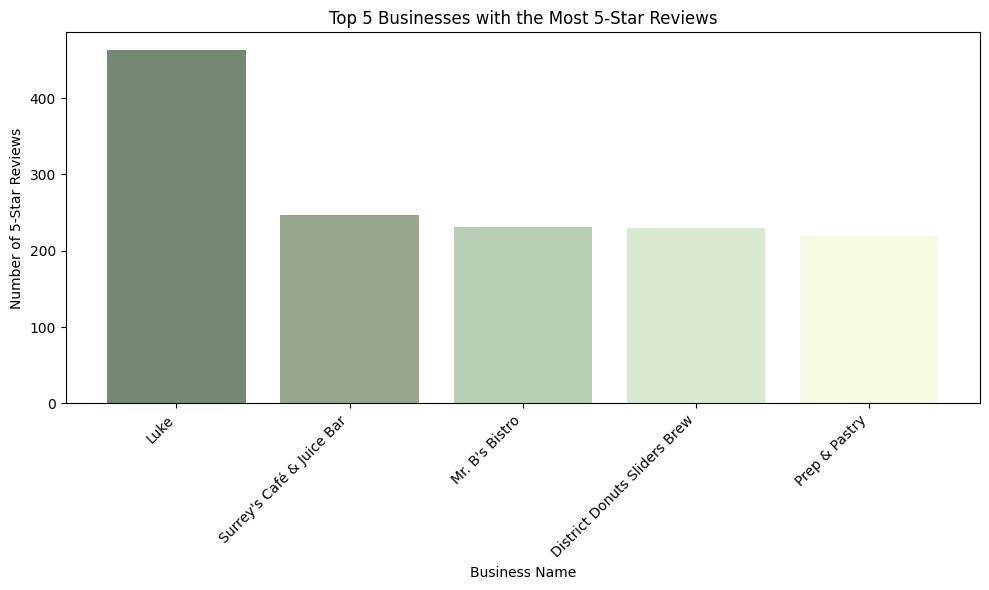

In [ ]:
import matplotlib.pyplot as plt

businesses = [item[0] for item in top5]
counts = [item[1] for item in top5]

plt.figure(figsize=(10, 6))
plt.bar(businesses, counts, color = ['#748873','#96A78D','#B6CEB4','#D9E9CF','#F5FAE1'])
plt.xlabel("Business Name")
plt.ylabel("Number of 5-Star Reviews")
plt.title("Top 5 Businesses with the Most 5-Star Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว (TK)

In [ ]:
import requests
import time
import re
from bs4 import BeautifulSoup
import urllib.request

# URLs ทั้งหมด
urls = [
    'https://www.laptopmag.com/reviews/best-laptops-1?utm_source=chatgpt.com',
    'https://www.theverge.com/21250695/best-laptops?utm_source=chatgpt.com',
    'https://news.ycombinator.com/item?id=43275014',
    'https://forums.macrumors.com/threads/air-or-pro-for-very-long-term-programming-stats-first-ever-mac.2466913/',
    'https://www.wired.com/gallery/best-laptops/?utm_source=chatgpt.com',
    'https://news.ycombinator.com/item?id=44558112&utm_source=chatgpt.com',
    'https://forum.freecodecamp.org/t/best-laptop-for-programming-why-review-sites-got-it-wrong/762870?utm_source=chatgpt.com',
    'https://www.rtings.com/laptop/reviews/best/by-usage/programming?utm_source=chatgpt.com',
    'https://www.itpro.com/hardware/laptops/360012/4-best-laptops-for-programming?utm_source=chatgpt.com',
    'https://www.techradar.com/news/best-laptop-for-programming?utm_source=chatgpt.com'
]

# headers ให้เหมือน browser จริง
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/127.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive"
}

def scrape_url(url):
    """Scrape URL and return cleaned text as bytes"""
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            html = response.text

            # Parse the HTML
            soup = BeautifulSoup(html, 'html.parser')

            # Extract all text from the page
            text = soup.get_text()

            # Clean whitespace
            clean_text = re.sub(r'\s+', ' ', text).strip()

            # แปลงเป็น bytes (UTF-8)
            return clean_text.encode("utf-8")
        else:
            print(f"⚠️ Failed {response.status_code}: {url}")
            return b""
    except Exception as e:
        print(f"❌ Error scraping {url}: {e}")
        return b""

# Initialize an empty list to store scraped data (as bytes)
scraped_data = []

# Loop through all URLs and scrape data
for url in urls:
    print(f"Scraping: {url}")
    data_bytes = scrape_url(url)
    scraped_data.append(data_bytes)
    time.sleep(2)

# Combine all scraped data into one big bytes object
combined_data = b" ".join(scraped_data)



# Show combined data preview (decode safely)
print("\nDecoded Preview (first 1000 chars):\n")
print(combined_data[:1000].decode("utf-8", errors="ignore"))

# Save combined bytes directly into a binary file
with open("data_bytes.bin", "wb") as f:
    f.write(combined_data)

print("\n✅ Data scraping and integration completed (bytes mode)!")


Scraping: https://www.laptopmag.com/reviews/best-laptops-1?utm_source=chatgpt.com
Scraping: https://www.theverge.com/21250695/best-laptops?utm_source=chatgpt.com
Scraping: https://news.ycombinator.com/item?id=43275014
Scraping: https://forums.macrumors.com/threads/air-or-pro-for-very-long-term-programming-stats-first-ever-mac.2466913/
Scraping: https://www.wired.com/gallery/best-laptops/?utm_source=chatgpt.com
Scraping: https://news.ycombinator.com/item?id=44558112&utm_source=chatgpt.com
Scraping: https://forum.freecodecamp.org/t/best-laptop-for-programming-why-review-sites-got-it-wrong/762870?utm_source=chatgpt.com
Scraping: https://www.rtings.com/laptop/reviews/best/by-usage/programming?utm_source=chatgpt.com
Scraping: https://www.itpro.com/hardware/laptops/360012/4-best-laptops-for-programming?utm_source=chatgpt.com
Scraping: https://www.techradar.com/news/best-laptop-for-programming?utm_source=chatgpt.com

Decoded Preview (first 1000 chars):

Best laptops in 2025: My top 10 based o

In [ ]:
type(combined_data)

bytes

In [ ]:
combined_data[:1000]

b"Best laptops in 2025: My top 10 based on testing and reviews | Laptop Mag Skip to main content Open menu Close main menu Laptop Mag US EditionUSCanadaUKAustralia RSS Sign in View Profile Sign out Search Search Laptop Mag Best Picks Ultimate Laptop Guide Apple 2-in-1 Laptops News Windows 11 More Chromebooks Deals Docking stations Smartphones Keyboards and mice AI PCs Reviews All laptop reviews Smartwatches How we test laptops About us Trending2-in-1 laptopsNintendo Switch 2 reviewHot Swap: The SeriesBest laptop deals Don't miss these Business Laptops I found the 6 best business laptops for 2025 based on our expert testing and reviews Macbooks MacBook Air vs. MacBook Pro 2025: Which Mac should you buy? Laptops I found the 6 best Lenovo laptops in 2025, and there's a near-perfect pick in every category Docks & Chargers Yes, you need a laptop docking station. And these 7 are the best for ports, power, and performance. Webcams The best webcams in 2025: The top picks, based on our real-wor

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น (TK)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# โหลด resource ที่จำเป็น
try:
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except:
    pass

def clean_text(text):
    """
    ฟังก์ชันสำหรับเตรียมข้อมูลและทำความสะอาดข้อความ:
    - แปลงเป็น lowercase
    - ลบเครื่องหมายวรรคตอนและสัญลักษณ์ที่ไม่จำเป็น
    - Tokenization
    - Removing stopwords
    - Stemming
    - Lemmatization
    """

    # 🔹 ตรวจสอบและแปลงข้อมูลเป็น string
    if isinstance(text, bytes):       # ถ้าเป็น bytes เช่น b"hello"
        text = text.decode('utf-8', errors='ignore')
    elif not isinstance(text, str):   # ถ้าไม่ใช่ string เช่น NaN หรือ object อื่น
        text = str(text)

    # 1. แปลงเป็นตัวพิมพ์เล็ก
    text = text.lower()

    # 2. ลบตัวเลขและสัญลักษณ์ที่ไม่จำเป็น (เก็บเฉพาะ a-z)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    # 5. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 7. รวมกลับเป็นข้อความ
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
cleaned_text = clean_text(combined_data)
cleaned_text

'best laptop top base test review laptop mag skip main content open menu close main menu laptop mag u editionuscanadaukaustralia rss sign view profil sign search search laptop mag best pick ultim laptop guid appl laptop news window chromebook deal dock station smartphon keyboard mouse ai pc review laptop review smartwatch test laptop u trendingin laptopsnintendo switch reviewhot swap seriesbest laptop deal dont miss busi laptop found best busi laptop base expert test review macbook macbook air v macbook pro mac buy laptop found best lenovo laptop there nearperfect pick everi categori dock charger ye need laptop dock station best port power perform webcam best webcam top pick base realworld test laptop power batteri life valu best laptop right window laptop nearli year histori best dell laptop buy today game laptop pc ive review game laptop top pick chromebook chromebook good laptop mani peopl best chromebook busi laptop speed clariti color best laptop graphic design laptop find best la

In [ ]:
type(cleaned_text)

str

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

Top 10 คำที่เจอบ่อยที่สุด

In [ ]:
#----------------------------------------------
# Your code starts here
from collections import Counter
# Word frequency analysis
word_freq = Counter(cleaned_text.split())
top_words = word_freq.most_common(10)

print("Top 10 most frequent words:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 10 most frequent words:
laptop: 713
best: 382
macbook: 213
pro: 199
gb: 179
inch: 178
batteri: 156
use: 146
review: 143
like: 140


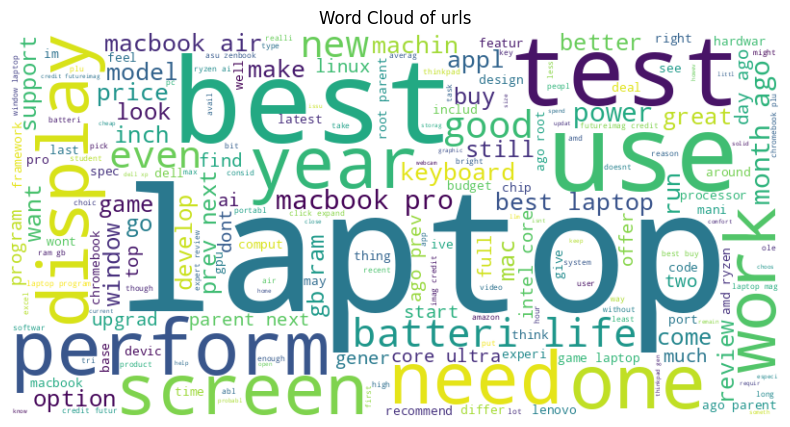

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of urls')
plt.show()

In [ ]:
from collections import Counter
tokens = cleaned_text.split()
word_freq = Counter(tokens)


คำที่มักปรากฏร่วมกัน (เช่น bigram/trigram) บ่งบอกประเด็นสำคัญอะไร

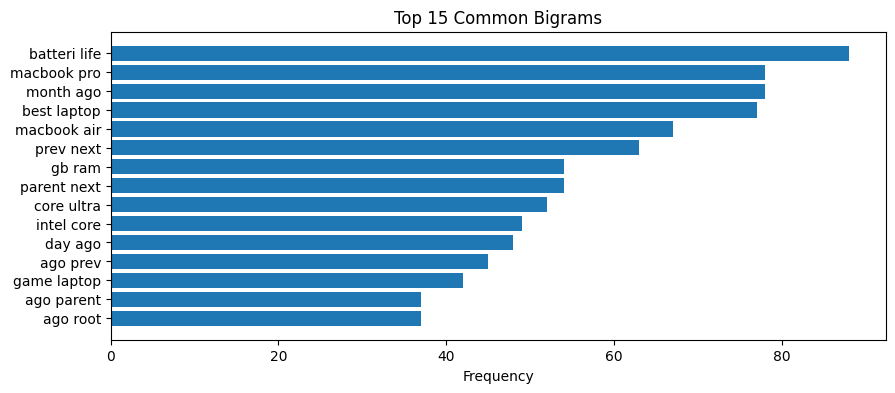

In [ ]:
from nltk import bigrams
bigram_list = list(bigrams(tokens))
bigram_freq = Counter(bigram_list).most_common(15)

bigrams_words = [' '.join(b) for b,_ in bigram_freq]
counts = [c for _,c in bigram_freq]

plt.figure(figsize=(10,4))
plt.barh(bigrams_words[::-1], counts[::-1])
plt.title("Top 15 Common Bigrams")
plt.xlabel("Frequency")
plt.show()


บ่งบอกว่าการรีวิว laptop ส่วนใหญ่พูดถึง batteri life คืออายุการใช้งานของแบตเตอรี่


หาคำสำคัญของแต่ละ url

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# แปลง bytes เป็น string และ clean
docs = [clean_text(data.decode('utf-8', errors='ignore')) for data in scraped_data]

# สร้าง TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(docs)

# แปลงเป็น DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=urls)

print(df_tfidf)


                                                         ago       air  \
https://www.laptopmag.com/reviews/best-laptops-...  0.000000  0.133120   
https://www.theverge.com/21250695/best-laptops?...  0.000000  0.112170   
https://news.ycombinator.com/item?id=43275014       0.763392  0.000000   
https://forums.macrumors.com/threads/air-or-pro...  0.000000  0.365371   
https://www.wired.com/gallery/best-laptops/?utm...  0.000000  0.107916   
https://news.ycombinator.com/item?id=44558112&u...  0.781990  0.007705   
https://forum.freecodecamp.org/t/best-laptop-fo...  0.000000  0.000000   
https://www.rtings.com/laptop/reviews/best/by-u...  0.000000  0.147927   
https://www.itpro.com/hardware/laptops/360012/4...  0.000000  0.032834   
https://www.techradar.com/news/best-laptop-for-...  0.000000  0.039346   

                                                     batteri      best  \
https://www.laptopmag.com/reviews/best-laptops-...  0.173953  0.440490   
https://www.theverge.com/21250695/bes


🔹 Top 5 words for https://www.laptopmag.com/reviews/best-laptops-1?utm_source=chatgpt.com:
laptop: 0.7282
best: 0.4405
macbook: 0.1948
batteri: 0.1740
review: 0.1678


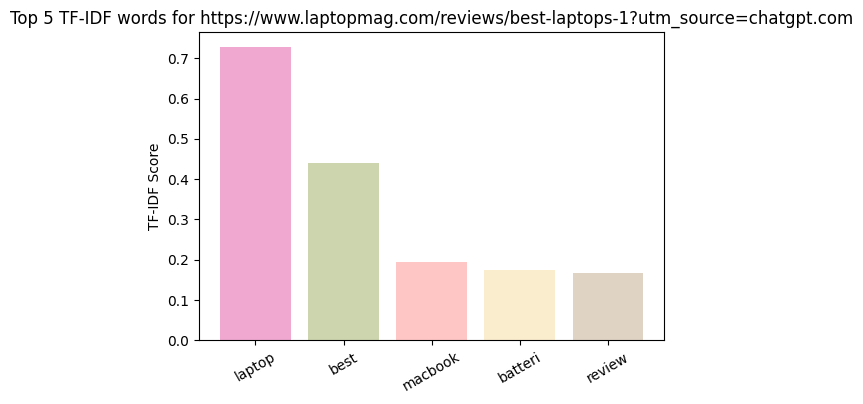


🔹 Top 5 words for https://www.theverge.com/21250695/best-laptops?utm_source=chatgpt.com:
laptop: 0.5550
inch: 0.4565
gb: 0.3959
best: 0.2913
pro: 0.1868


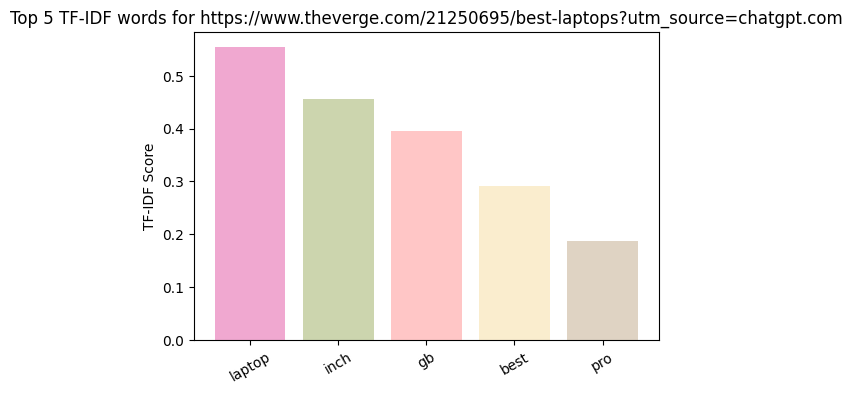


🔹 Top 5 words for https://news.ycombinator.com/item?id=43275014:
ago: 0.7634
next: 0.5562
laptop: 0.2311
gb: 0.1009
use: 0.0967


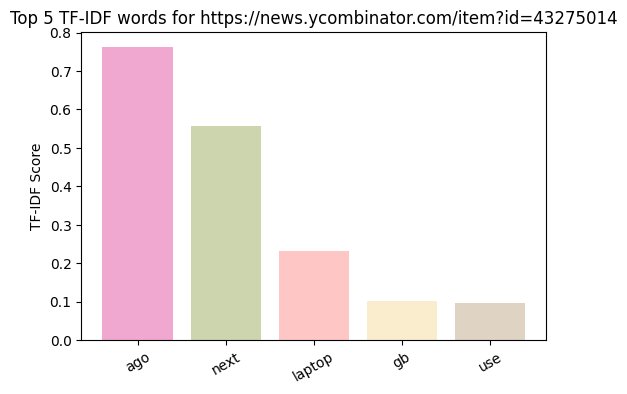


🔹 Top 5 words for https://forums.macrumors.com/threads/air-or-pro-for-very-long-term-programming-stats-first-ever-mac.2466913/:
year: 0.4662
pro: 0.4407
air: 0.3654
use: 0.3563
get: 0.3333


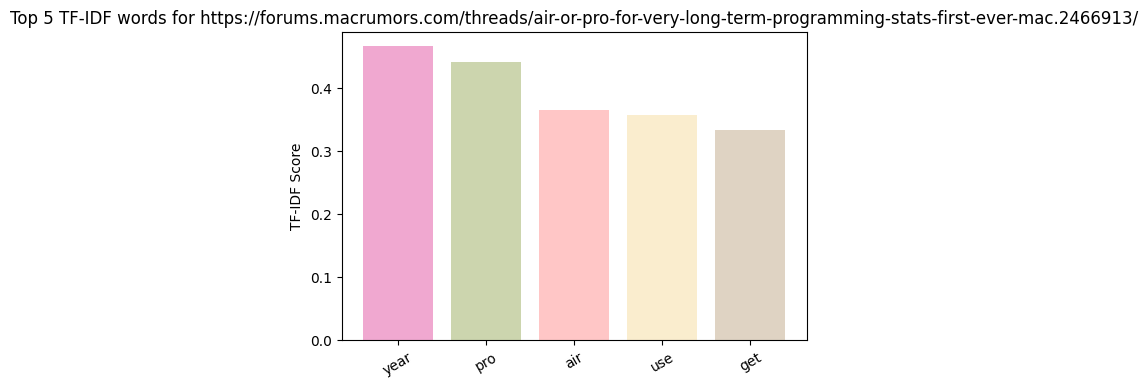


🔹 Top 5 words for https://www.wired.com/gallery/best-laptops/?utm_source=chatgpt.com:
laptop: 0.7048
inch: 0.3555
best: 0.2980
batteri: 0.2073
gb: 0.2045


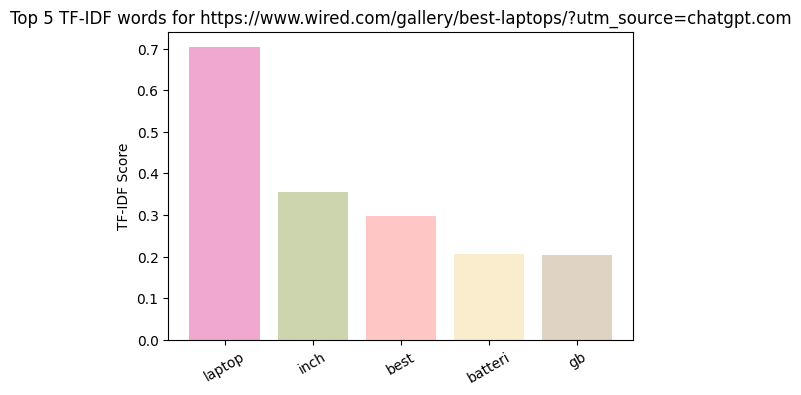


🔹 Top 5 words for https://news.ycombinator.com/item?id=44558112&utm_source=chatgpt.com:
ago: 0.7820
next: 0.5509
laptop: 0.2374
batteri: 0.0914
macbook: 0.0642


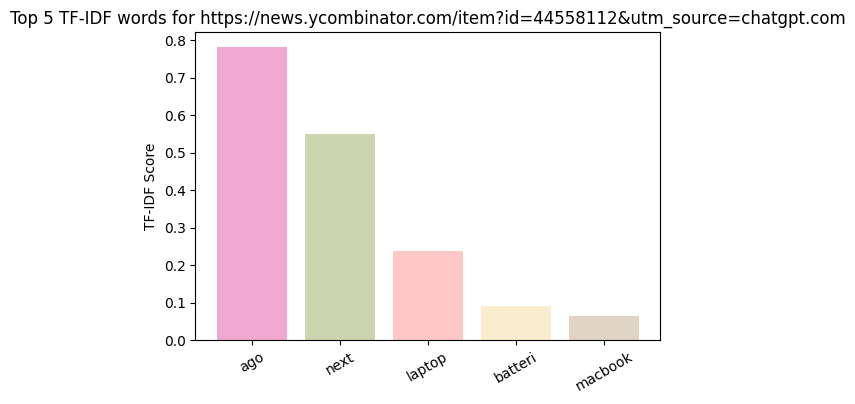


🔹 Top 5 words for https://forum.freecodecamp.org/t/best-laptop-for-programming-why-review-sites-got-it-wrong/762870?utm_source=chatgpt.com:
laptop: 0.7806
use: 0.3886
review: 0.2838
best: 0.2129
macbook: 0.2129


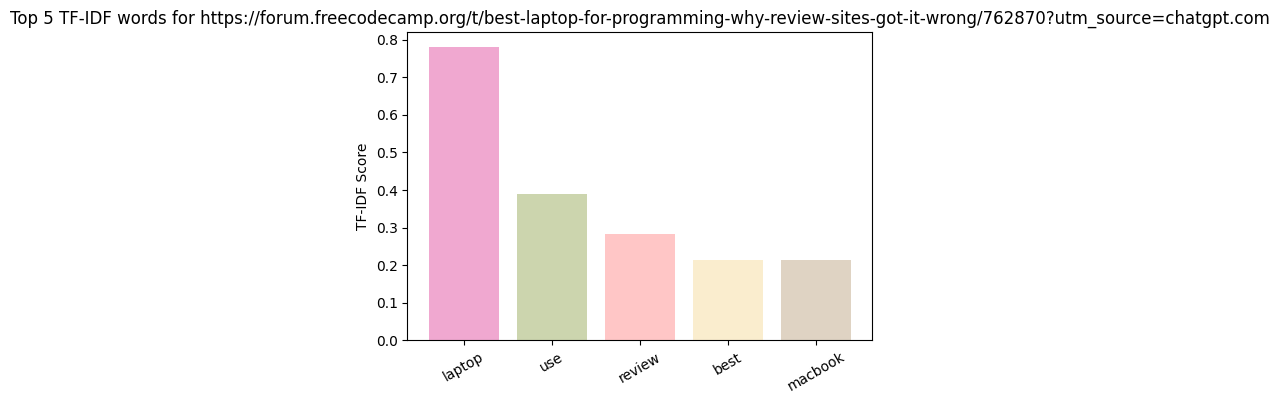


🔹 Top 5 words for https://www.rtings.com/laptop/reviews/best/by-usage/programming?utm_source=chatgpt.com:
laptop: 0.6160
game: 0.4048
best: 0.3696
review: 0.3696
macbook: 0.2464


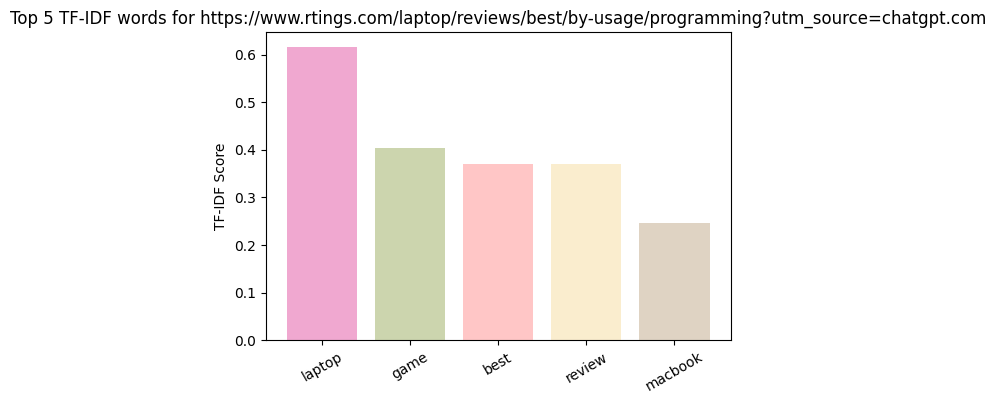


🔹 Top 5 words for https://www.itpro.com/hardware/laptops/360012/4-best-laptops-for-programming?utm_source=chatgpt.com:
laptop: 0.5196
pro: 0.4102
best: 0.3828
macbook: 0.3555
gb: 0.2627


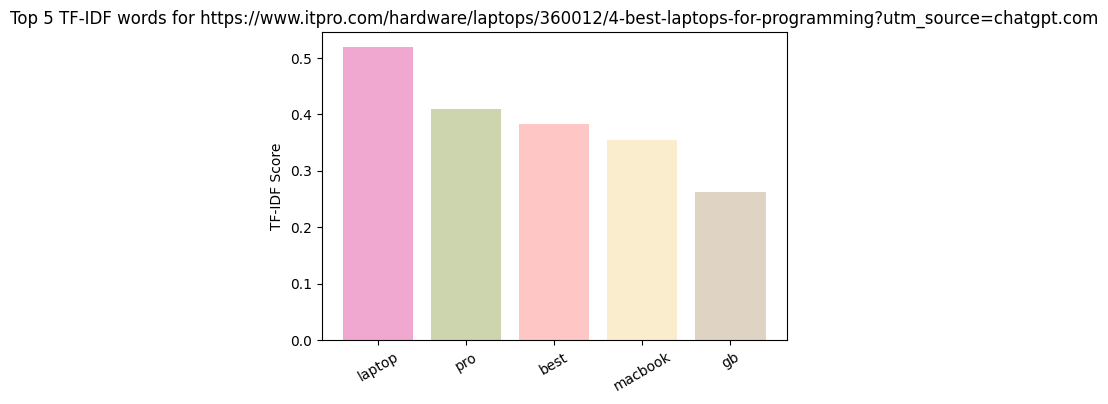


🔹 Top 5 words for https://www.techradar.com/news/best-laptop-for-programming?utm_source=chatgpt.com:
laptop: 0.5899
best: 0.5833
test: 0.2676
review: 0.2294
pro: 0.1966


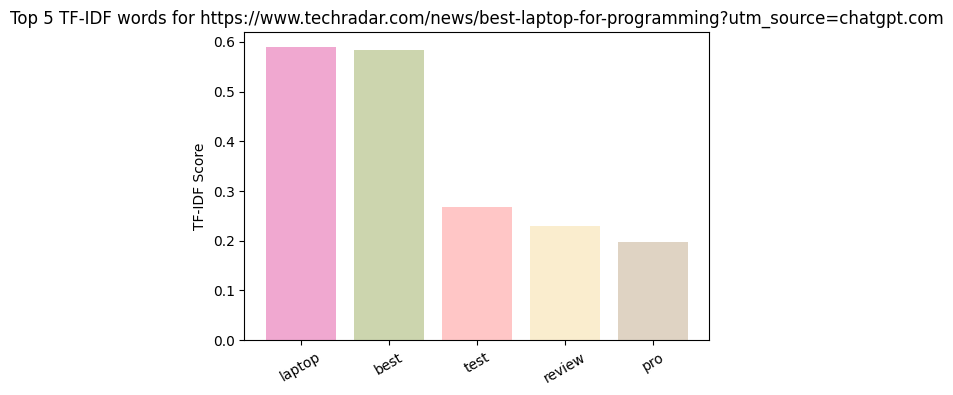

In [ ]:
import matplotlib.pyplot as plt

# หา feature names (คำทั้งหมดที่ TF-IDF เลือกมา)
feature_names = vectorizer.get_feature_names_out()

# Loop แต่ละเว็บ
for i, url in enumerate(urls):
    # ดึง row ของเว็บนั้น
    row = tfidf_matrix[i].toarray().flatten()

    # จับคู่คำกับค่าคะแนน TF-IDF
    word_tfidf = dict(zip(feature_names, row))

    # เรียงจากมากไปน้อย
    top5_words = dict(sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)[:5])

    # แสดงผลใน console
    print(f"\n🔹 Top 5 words for {url}:")
    for word, score in top5_words.items():
        print(f"{word}: {score:.4f}")

    # Visualization กราฟแท่ง
    plt.figure(figsize=(6,4))
    plt.bar(top5_words.keys(), top5_words.values(), color=['#F0A8D0','#CCD5AE','#FFC6C6','#FAEDCE','#DFD3C3'])
    plt.title(f"Top 5 TF-IDF words for {url}")
    plt.ylabel("TF-IDF Score")
    plt.xticks(rotation=30)
    plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

score = sia.polarity_scores(cleaned_text)
print(score)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.026, 'neu': 0.798, 'pos': 0.176, 'compound': 1.0}


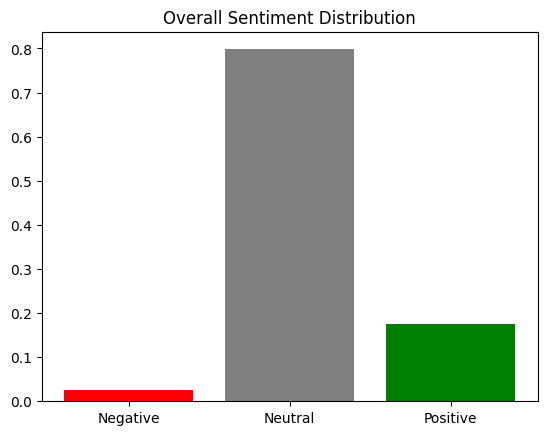

In [ ]:
labels = ['Negative', 'Neutral', 'Positive']
values = [score['neg'], score['neu'], score['pos']]

plt.bar(labels, values, color=['red','gray','green'])
plt.title('Overall Sentiment Distribution')
plt.show()


In [ ]:
pos_words = []
neg_words = []
for w in tokens:
    sc = sia.polarity_scores(w)['compound']
    if sc > 0.3: pos_words.append(w)
    elif sc < -0.3: neg_words.append(w)

print("Positive words:", len(pos_words))
print("Negative words:", len(neg_words))


Positive words: 1523
Negative words: 165


สัดส่วนของคำประเภทบวกหรือลบ (positive/negative words)

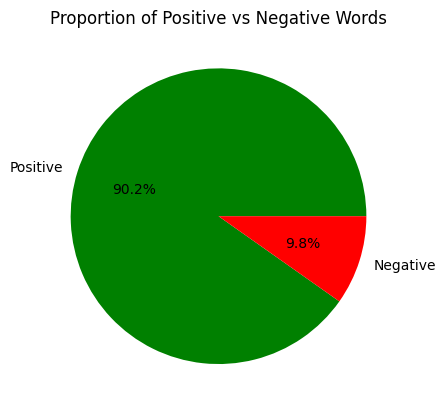

In [ ]:
plt.pie([len(pos_words), len(neg_words)], labels=['Positive','Negative'],
        autopct='%1.1f%%', colors=['green','red'])
plt.title("Proportion of Positive vs Negative Words")
plt.show()


In [ ]:
tokens = cleaned_text.split()
pos_words, neg_words = [], []

for w in tokens:
    score = sia.polarity_scores(w)['compound']
    if score > 0.3:
        pos_words.append(w)
    elif score < -0.3:
        neg_words.append(w)

print("Positive Words:", pos_words[:20])
print("Negative Words:", neg_words[:20])


Positive Words: ['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'good', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best']
Negative Words: ['problem', 'woe', 'lack', 'bad', 'weak', 'worst', 'mess', 'punish', 'spam', 'distort', 'fire', 'shame', 'dull', 'alarm', 'dull', 'poor', 'dull', 'poor', 'weak', 'lack']


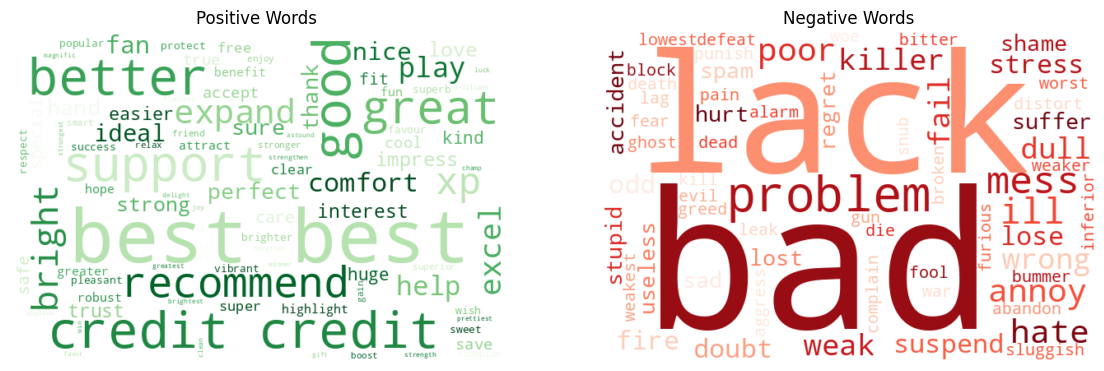

In [ ]:
pos_text = ' '.join(pos_words)
neg_text = ' '.join(neg_words)

fig, ax = plt.subplots(1,2, figsize=(14,6))
wc_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(pos_text)
wc_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(neg_text)

ax[0].imshow(wc_pos, interpolation='bilinear'); ax[0].axis('off'); ax[0].set_title('Positive Words')
ax[1].imshow(wc_neg, interpolation='bilinear'); ax[1].axis('off'); ax[1].set_title('Negative Words')
plt.show()


Top 3 laptops ที่ถูกพูดถึงมากที่สุด

In [ ]:
# Suppose you have:
# tokens = cleaned tokens (list of words)
# cleaned_text = full cleaned text (string)

models = [
    "macbook air",
    "macbook pro ",
    "dell xps 13",
    "asus rog zephyrus g14",
    "lenovo thinkpad t14",
    "hp spectre x360",
    "acer nitro",
    "razer blade",
    "surface laptop",
]

# Count model mentions
model_counts = {}
text = cleaned_text.lower()

for model in models:
    # Escape model for regex, ensure word boundaries
    import re
    pattern = r'\b' + re.escape(model) + r'\b'
    count = len(re.findall(pattern, text))
    model_counts[model] = count

# Sort top 3
top3 = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)[:3]
for model, cnt in top3:
    print(f"{model}: {cnt} mentions")


macbook pro : 78 mentions
macbook air: 67 mentions
razer blade: 8 mentions


<BarContainer object of 3 artists>

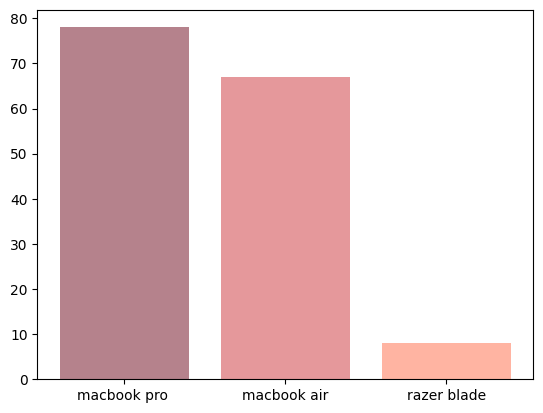

In [ ]:
plt.bar([model for model, _ in top3], [cnt for _, cnt in top3], color=['#B5828C','#E5989B','#FFB4A2'])

Top 5 laptops ที่ถูกพูดถึงมากที่สุดเชิงบวก เชิงลบ และเป็นกลาง

In [ ]:
laptop_models = [
    "macbook air",
    "macbook pro",
    "dell xps",
    "asus rog zephyrus",
    "lenovo thinkpad",
    "hp spectre",
    "razer blade",
    "surface laptop",
    "acer nitro"
]
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(cleaned_text)  # cleaned_text จากขั้นตอนก่อนหน้า
results = []

for sent in sentences:
    sentiment_score = sia.polarity_scores(sent)['compound']
    results.append((sent, sentiment_score))


sentiment_by_model = {m: {'pos': 0, 'neg': 0, 'neu': 0} for m in laptop_models}

for sent, score in results:
    sent_lower = sent.lower()
    for model in laptop_models:
        if model in sent_lower:
            if score >= 0.05:
                sentiment_by_model[model]['pos'] += 1
            elif score <= -0.05:
                sentiment_by_model[model]['neg'] += 1
            else:
                sentiment_by_model[model]['neu'] += 1
import pandas as pd

df = pd.DataFrame(sentiment_by_model).T
df.columns = ['Positive', 'Negative', 'Neutral']
df['Total'] = df.sum(axis=1)
df = df.sort_values('Total', ascending=False)

print("📊 รวมผลทั้งหมด:")
print(df)

📊 รวมผลทั้งหมด:
                   Positive  Negative  Neutral  Total
macbook air               1         0        0      1
macbook pro               1         0        0      1
lenovo thinkpad           1         0        0      1
acer nitro                1         0        0      1
razer blade               1         0        0      1
asus rog zephyrus         0         0        0      0
dell xps                  0         0        0      0
hp spectre                0         0        0      0
surface laptop            0         0        0      0


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **